#  Logistic Regression

In [98]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [99]:
# Importing the dataset
df = pd.read_csv('happiness.csv',sep=';')
df = df.drop(['Overall_rank'], axis='columns', inplace=False)
df

,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Fr_to_make_choices,Generosity,Perceptions_of_corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393000
1,7.600,1.383,1.573,0.996,0.592,0.252,0.394216
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341000
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118000
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298000
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.394216
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147000
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025000
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035000


<AxesSubplot:ylabel='Frequency'>

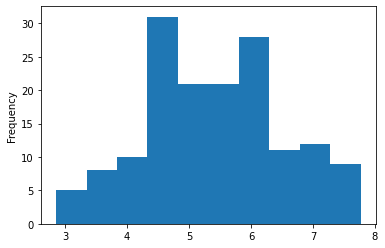

In [100]:
# Feature distribution
df['Score'].plot(kind = 'hist')

In [101]:
df["happiness"] =  np.where(df['Score'] <= 5.8, 0, 1)
df

,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Fr_to_make_choices,Generosity,Perceptions_of_corruption,happiness
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393000,1
1,7.600,1.383,1.573,0.996,0.592,0.252,0.394216,1
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341000,1
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118000,1
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298000,1
...,...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.394216,0
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147000,0
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025000,0
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035000,0


In [102]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:,:-1]
y = df['happiness']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [103]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [104]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.139455
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.791     
Dependent Variable: happiness        AIC:              48.5849   
Date:               2021-11-02 15:28 BIC:              68.3269   
No. Observations:   124              Log-Likelihood:   -17.292   
Df Model:           6                LL-Null:          -82.762   
Df Residuals:       117              LLR p-value:      8.1556e-26
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    11.6451      3.1955     3.6442    0.0003     5.3821    17.9081
x2     0.1654      1.2209     0.1354    0.8923    -2.

In [105]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=12)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

1
[ True False False False False False False]
[1 2 3 4 5 7 6]


In [106]:
# Selected Features
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[0]
№	Index	Feature
0	0	Score


In [107]:
# Leaving only Selected Features
#X_train_select=X_train[:, selected_columns]
#X_test_select=X_test[:, selected_columns]

In [108]:
X_train = X_train[:,[0,6]]
X_test = X_test[:,[0,6]]

In [109]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [110]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

1.0

In [111]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[20  0]
 [ 0 12]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


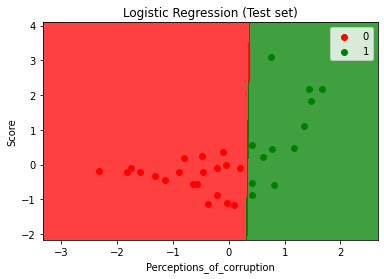

In [112]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Perceptions_of_corruption')
plt.ylabel('Score')
plt.legend()
plt.show()

In [113]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()